# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn 

from sklearn.preprocessing import StandardScaler      
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import zscore
from scipy.spatial import distance

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
df = pd.read_csv(r'C:\Users\248789.USTR\Desktop\GL\marketing.csv')
df.sample(n=5) 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
429,3767,1968,Graduation,Married,61314.0,0,1,25-04-2013,1,378,...,5,12,3,0,0,0,0,0,0,0
512,5389,1964,Graduation,Married,48920.0,0,2,20-10-2013,93,238,...,2,5,7,0,1,0,0,0,0,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,10,7,1,0,0,1,1,0,0,1
231,5341,1962,2n Cycle,Divorced,81975.0,0,1,5/1/2013,2,983,...,3,4,7,0,0,1,0,0,0,0
1604,11092,1961,Graduation,Married,27116.0,1,1,2/3/2014,78,12,...,0,3,7,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [4]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [5]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [6]:
df.duplicated().sum() # check the sum of duplicate records


0

### 5. Drop the columns which you think redundant for the analysis 

In [7]:
df = df.drop(columns=['ID', 'Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:

replace_dict = { 
                'Married' : 'relationship', 
                'Together' : 'relationship', 
                'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single',
                }
df['Marital_Status'] = df['Marital_Status'].replace(replace_dict)

In [10]:
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [11]:
df['Total_Expenses'] =  df[['MntWines' , 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',  'MntGoldProds']].sum(axis=1)

In [12]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [13]:
df['Num_Total_Expenses'] =  df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [14]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [15]:
df['Kids'] = df['Kidhome'] +df['Teenhome']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Expenses,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [16]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,422,19,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [17]:
drop_cols = ['MntWines' , 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',  'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases' ,  'Kidhome' , 'Teenhome' , 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df = df.drop(columns=drop_cols, axis=1)

In [18]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [19]:
df['Age'] = 2024 - df['Year_Birth']

df.drop(columns=['Year_Birth'], axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43


### 13. Encode the categorical variables in the dataset

In [20]:

dfc=df.copy()

label_encoder = LabelEncoder()
df['EducationLabel'] = label_encoder.fit_transform(df['Education'])
df['MaritalStat_Label'] = label_encoder.fit_transform(df['Marital_Status']) 
df.drop(columns=['Education', 'Marital_Status'], axis=1, inplace=True)

df.sample(n=5)


,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp,Age,EducationLabel,MaritalStat_Label
483,43057.0,30,5,0,266,15,1,0,49,2,1
660,56253.0,83,6,0,597,22,1,0,61,2,1
1683,23536.0,53,3,0,10,4,1,0,41,4,1
2021,43815.0,53,6,0,79,6,1,0,42,3,1
1143,33419.0,76,7,0,86,8,1,0,62,4,0


### 14. Standardize the columns, so that values are in a particular range

In [21]:
df1= df.copy()

In [22]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index =df1.index, columns=df1.columns)
scaled_features_df.head()



,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp,Age,EducationLabel,MaritalStat_Label
0,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345,-0.350141,-1.346874
1,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733,-0.350141,-1.346874
2,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643,-0.350141,0.742460
3,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149,-0.350141,0.742460
4,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761,1.428354,0.742460


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

Text(0, 0.5, 'Exmplained variance ratio')

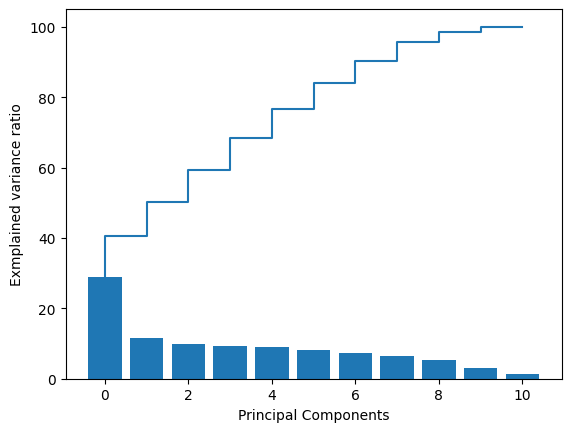

In [23]:

cov_matrix  = np.cov(scaled_features.T)


eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

#screen plot
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(range(11), var_exp, align='center')
plt.step(range(11), cum_var_exp)
plt.xlabel("Principal Components")
plt.ylabel("Exmplained variance ratio")



### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [24]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns =['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


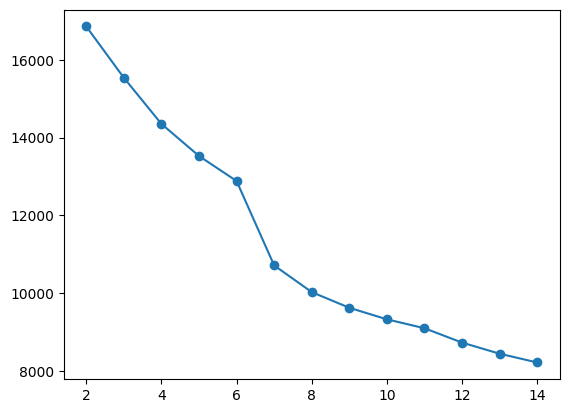

In [25]:
#find optimal K using elbow plot
cluster_errors = []

cluster_range=range(2,15)

for num_clusters in cluster_range:
    cluster= KMeans(num_clusters, random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df  = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o')

In [26]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [27]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,1
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,1
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,2
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,0


In [28]:
kmeans_df['Label'].value_counts()

Label
2    795
0    753
1    692
Name: count, dtype: int64

<Axes: >

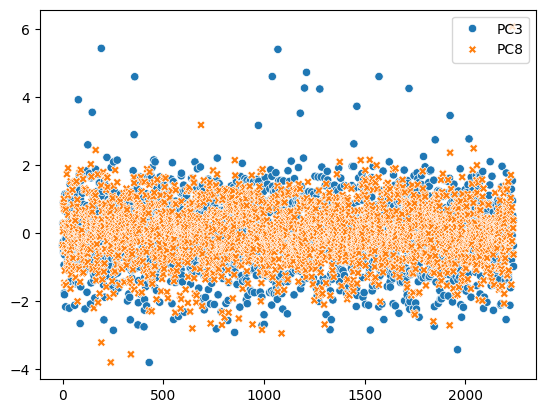

In [29]:
sns.scatterplot([kmeans_df['PC3'],kmeans_df['PC8']])

<Axes: xlabel='PC1', ylabel='PC2'>

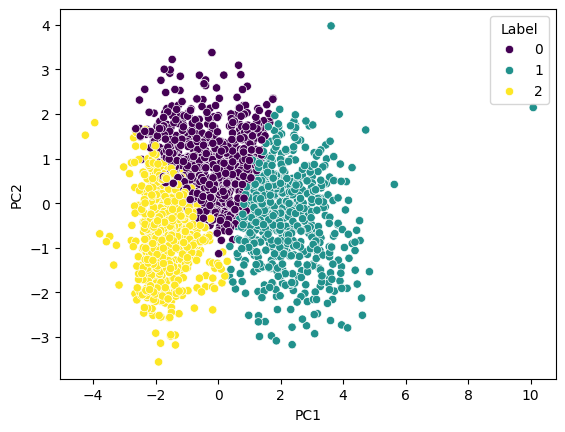

In [30]:
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2', hue='Label', palette='viridis')

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

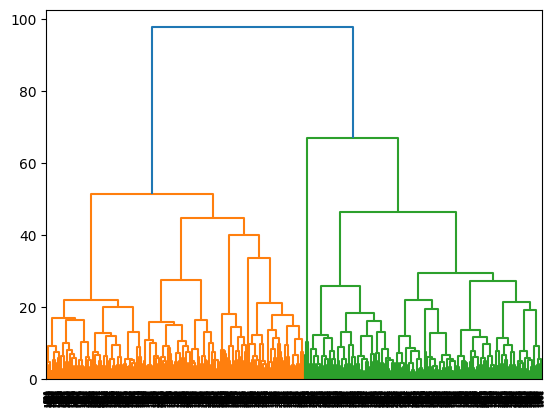

In [31]:
merge = linkage(scaled_features, method='ward')
dendrogram(merge, leaf_rotation=90)
plt.show()

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df, labels))

2 0.19083932398834774
3 0.19859065923114574
4 0.11245037433433143
5 0.11424621756836158
6 0.13181821517742506
7 0.13957002140153735
8 0.13907063102662123
9 0.11337088108552162
10 0.1119213122511858
11 0.10382081162123023
12 0.10893099764751871
13 0.1023394958828042
14 0.09549869159542168
15 0.09916157110674134
16 0.0971095257166718
17 0.09489252379396232
18 0.09364631036611375
19 0.09198831621613623
20 0.0944474986483792
21 0.09485319565428957
22 0.09668011531577164
23 0.10011826448528599
24 0.10008982911415182


In [34]:
hie_cluster  = AgglomerativeClustering(n_clusters=3, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)
                                       

In [35]:
df_label1  = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,0


In [36]:
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Expenses,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

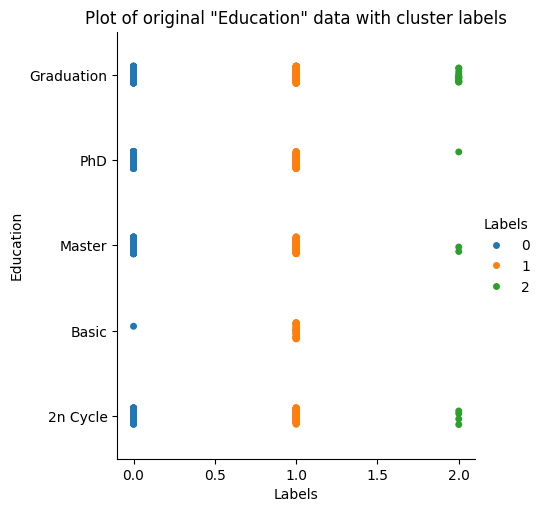

In [39]:

sns.catplot(x='Labels', y='Education', hue='Labels', data=df_hier, palette='tab10')
plt.title('Plot of original "Education" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Education')
plt.show()

##Observation
*Most customers have graduation or above level. 
*very few customers have basic education.

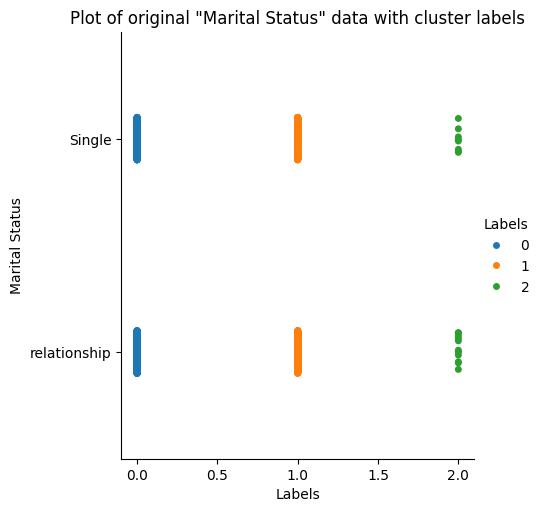

In [46]:
sns.catplot(x='Labels', y='Marital_Status', hue='Labels', data=df_hier, palette='tab10')
plt.title('Plot of original "Marital Status" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Marital Status')
plt.show()

In [ ]:
##Class 1,2 have similar density as shown above

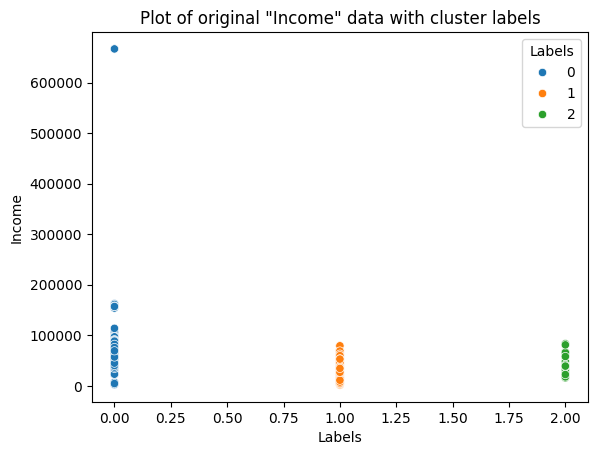

In [47]:
sns.scatterplot(x='Labels', y='Income', hue='Labels', data=df_hier, palette='tab10')
plt.title('Plot of original "Income" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Income')
plt.show()

In [ ]:
##Customers in cluster 1 have more average income that others

-----
## Happy Learning
-----